In [2]:
# загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report



In [3]:
# загрузка датасета
url='https://raw.githubusercontent.com/kintis/HomeWork/main/sonar.all-data.csv'
df=pd.read_csv(url, sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(208, 61)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [6]:
pd.set_option("display.precision", 3)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


In [7]:
df[60].unique()

array(['R', 'M'], dtype=object)

In [8]:
df[60]=df[60].astype('category').cat.codes
df[60].unique()

array([1, 0], dtype=int8)

In [9]:
# распределение по классам -> классы сбалансированыы
df.groupby(60).size()


60
0    111
1     97
dtype: int64

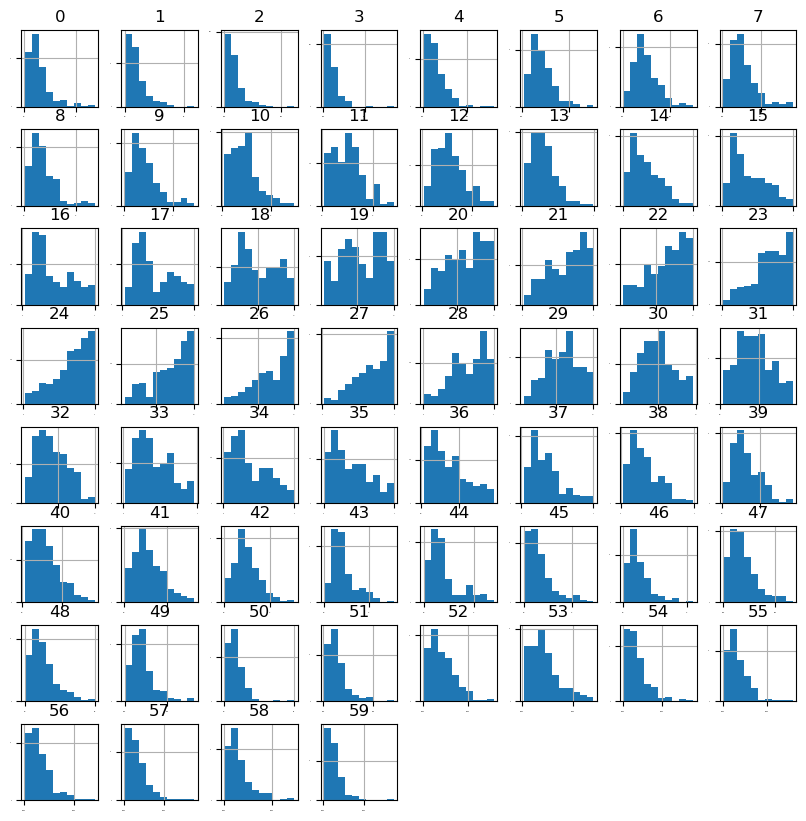

In [241]:
# визуализация гистограмма
df[df.columns[:-1]].hist(figsize=(10,10), xlabelsize=1, ylabelsize=1)
plt.show()

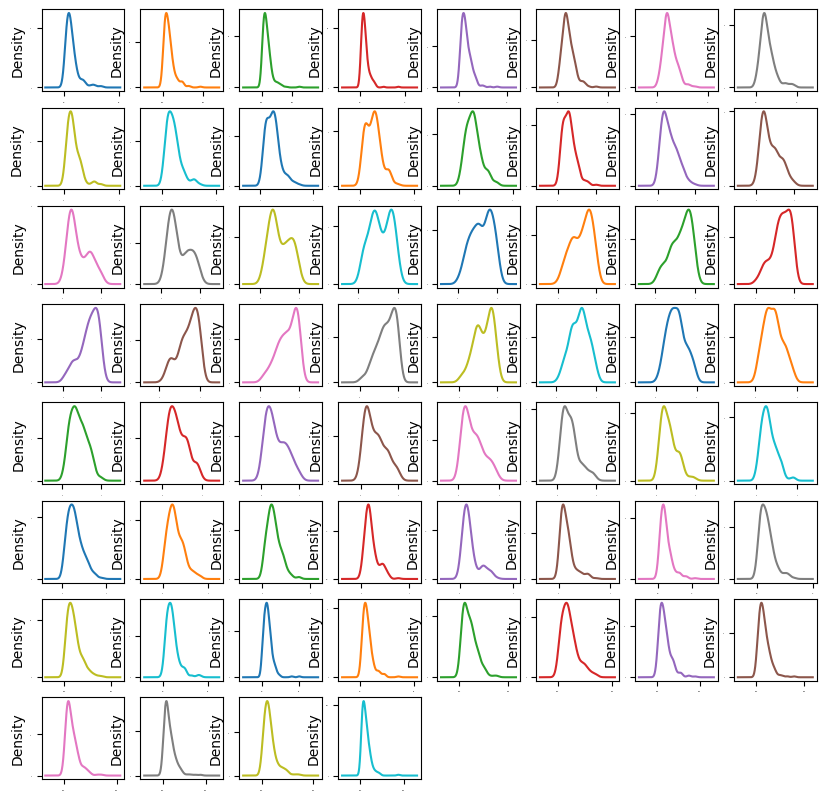

In [242]:
# визуализация распределение плотности
df[df.columns[:-1]].plot(kind='density', subplots=True, layout=(8,8), figsize=(10, 10), sharex=False, legend=False, fontsize=1)
plt.show()
# Вывод: наблюдается ассиметрия у некоторых признаков.

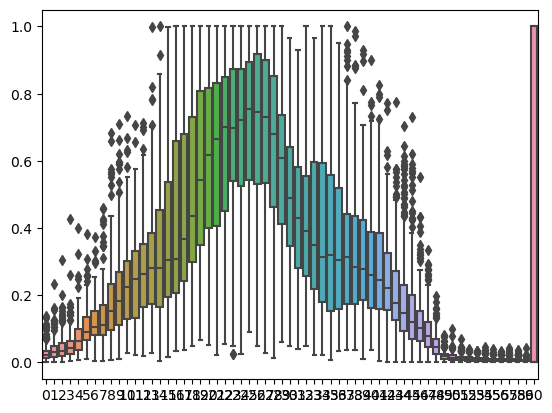

In [23]:
# визуализация "ящик с усами"
sns.boxplot(df)
#sns.boxplot(df[df.columns[13]])
#df.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False, figsize=(8,8))
plt.show()
#! ошибка


In [ ]:
df[df.columns[:-1]].corr()

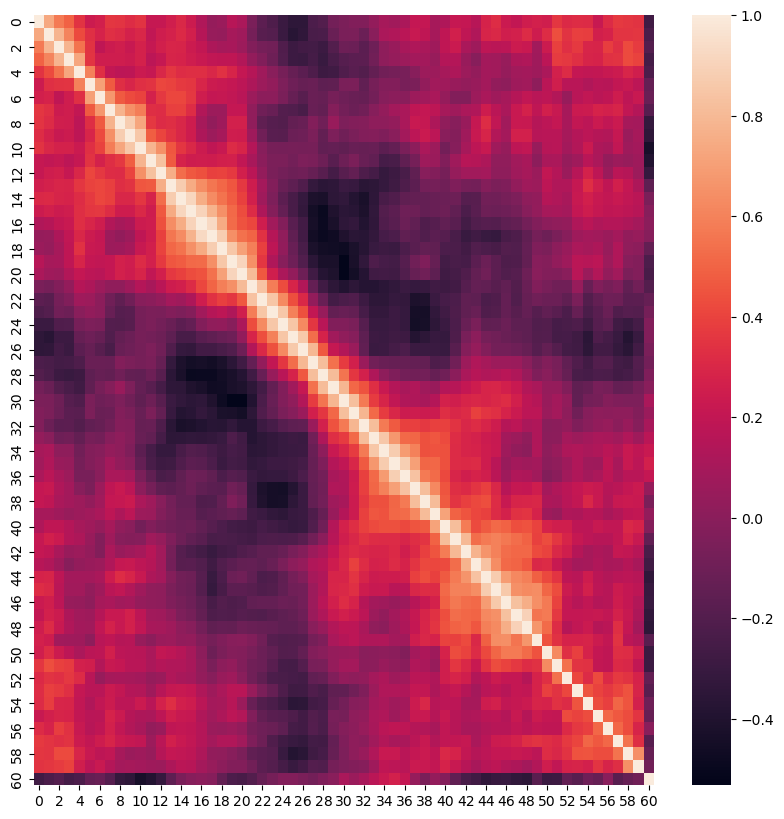

In [150]:
# визуализация
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = False) 
plt.show()

In [11]:
# Разбивка на обучающий и тестовый датасеты
array=df.values
X=array[:, :60]
y=array[:, 60]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=13, shuffle=True)


In [12]:
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))



In [14]:
# Оценка точности алгоритмов на исходных данных
results=[]
names=[]
for name, model in models:
    kf=KFold(n_splits=10, random_state=13, shuffle=True)
    cv_results=cross_val_score(model, X_train, y_train,cv=kf, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"Модель {name}: accuracy-> {round(cv_results.mean(), 2)}, std-> {round(cv_results.std(), 2)}")

    

Модель LR: accuracy-> 0.74, std-> 0.09
Модель LDA: accuracy-> 0.68, std-> 0.08
Модель SVM: accuracy-> 0.74, std-> 0.11
Модель KNN: accuracy-> 0.76, std-> 0.11
Модель NB: accuracy-> 0.68, std-> 0.13
Модель CART: accuracy-> 0.68, std-> 0.08


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_10428\1552279389.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


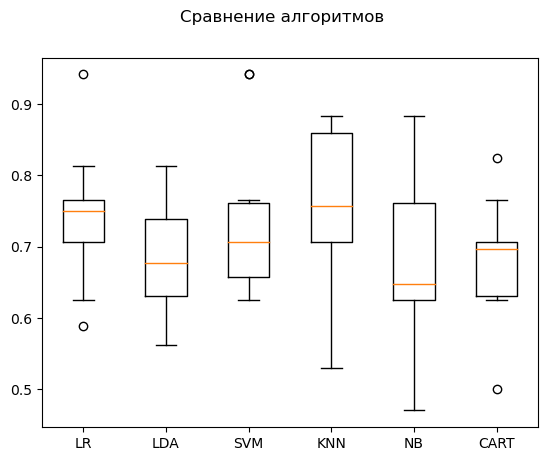

In [15]:
fig=plt.figure()
fig.suptitle('Сравнение алгоритмов')
ax=fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results)
plt.show()

In [16]:
# Оценка алгоритмов на стандартизованных данных
pipelines=[]
pipelines.append(('scaledLR', Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('scaledLDA', Pipeline([('scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('scaledSVM', Pipeline([('scaler', StandardScaler()), ('SVM', SVC())])))
pipelines.append(('scaledKNN', Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('scaledNB', Pipeline([('scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('scaledCART', Pipeline([('scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))

results=[]
names=[]
for name, model in pipelines:
    kf=KFold(n_splits=10, random_state=13, shuffle=True)
    cv_results=cross_val_score(model, X_train, y_train,cv=kf, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"Модель {name}: accuracy-> {round(cv_results.mean(), 2)}, std-> {round(cv_results.std(), 2)}")


Модель scaledLR: accuracy-> 0.75, std-> 0.09
Модель scaledLDA: accuracy-> 0.68, std-> 0.08
Модель scaledSVM: accuracy-> 0.81, std-> 0.1
Модель scaledKNN: accuracy-> 0.8, std-> 0.11
Модель scaledNB: accuracy-> 0.68, std-> 0.13
Модель scaledCART: accuracy-> 0.68, std-> 0.11


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_10428\34530396.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


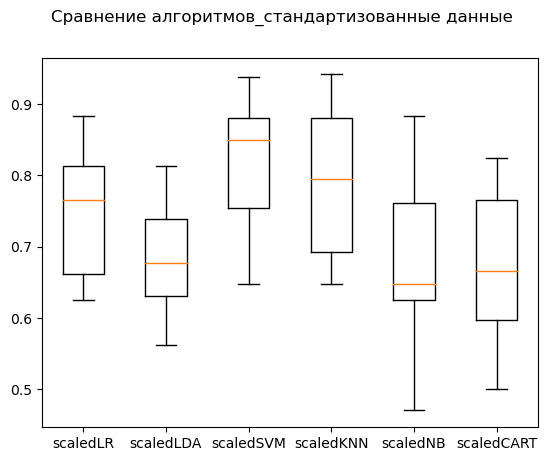

In [17]:
fig=plt.figure()
fig.suptitle('Сравнение алгоритмов_стандартизованные данные')
ax=fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results)
plt.show()

***SVM и KNN показывают лучшие метрики. Выберем их для построения модели.***

In [19]:
# Подбор гиперпараметров для SVM (Regularization parameter - С, kernel)
scaler=StandardScaler().fit(X_train)
scaledX=scaler.transform(X_train)
parameters={'C':[0.5, 0.8, 1, 1.1, 1.2, 1.5, 1.8, 2], 'kernel':('linear', 'poly', 'rbf', 'sigmoid')}

model=SVC()
kf=KFold(n_splits=10, random_state=13, shuffle=True)

grid=GridSearchCV(model, parameters, cv=kf, scoring='accuracy')
grid_res=grid.fit(scaledX, y_train)
print(f"Лучшая точность {round(grid_res.best_score_, 2)} с параметрами {grid_res.best_params_}")

mean_values=grid_res.cv_results_['mean_test_score']
std_values=grid_res.cv_results_['std_test_score']
parameters_values=grid_res.cv_results_['params']

sorted_zip = sorted(zip(mean_values, std_values, parameters_values), key = lambda value : value[0], reverse = True)
for mean, std, parameter in sorted_zip:
    print(f"accuracy-> {round(mean, 2)}, std-> {round(std, 2)} parameters-> {parameter}")



Лучшая точность 0.83 с параметрами {'C': 1.2, 'kernel': 'rbf'}
accuracy-> 0.83, std-> 0.1 parameters-> {'C': 1.2, 'kernel': 'rbf'}
accuracy-> 0.82, std-> 0.11 parameters-> {'C': 1.5, 'kernel': 'rbf'}
accuracy-> 0.82, std-> 0.11 parameters-> {'C': 1.8, 'kernel': 'rbf'}
accuracy-> 0.81, std-> 0.1 parameters-> {'C': 1.1, 'kernel': 'rbf'}
accuracy-> 0.81, std-> 0.11 parameters-> {'C': 2, 'kernel': 'rbf'}
accuracy-> 0.81, std-> 0.08 parameters-> {'C': 2, 'kernel': 'poly'}
accuracy-> 0.8, std-> 0.09 parameters-> {'C': 1, 'kernel': 'rbf'}
accuracy-> 0.8, std-> 0.09 parameters-> {'C': 1.8, 'kernel': 'poly'}
accuracy-> 0.78, std-> 0.08 parameters-> {'C': 1.1, 'kernel': 'poly'}
accuracy-> 0.78, std-> 0.09 parameters-> {'C': 0.8, 'kernel': 'rbf'}
accuracy-> 0.78, std-> 0.08 parameters-> {'C': 1, 'kernel': 'poly'}
accuracy-> 0.78, std-> 0.09 parameters-> {'C': 1.2, 'kernel': 'poly'}
accuracy-> 0.78, std-> 0.09 parameters-> {'C': 1.5, 'kernel': 'poly'}
accuracy-> 0.78, std-> 0.12 parameters-> {'C':

In [20]:
# Подбор гиперпараметров для KNN (n_neighbors)
scaler=StandardScaler().fit(X_train)
scaledX=scaler.transform(X_train)
parameters={'n_neighbors':[1,3,5,7,9,11,13,15,17]}

model=KNeighborsClassifier()
kf=KFold(n_splits=10, random_state=13, shuffle=True)

grid=GridSearchCV(model, parameters, cv=kf, scoring='accuracy')
grid_res=grid.fit(scaledX, y_train)
print(f"Лучшая точность {round(grid_res.best_score_, 2)} с параметром {grid_res.best_params_}")

mean_values=grid_res.cv_results_['mean_test_score']
std_values=grid_res.cv_results_['std_test_score']
parameters_values=grid_res.cv_results_['params']

sorted_zip = sorted(zip(mean_values, std_values, parameters_values), key = lambda value : value[0], reverse = True)
for mean, std, parameter in sorted_zip:
    print(f"accuracy-> {round(mean, 2)}, std-> {round(std, 2)} parameter-> {parameter}")



Лучшая точность 0.86 с параметром {'n_neighbors': 1}
accuracy-> 0.86, std-> 0.1 parameter-> {'n_neighbors': 1}
accuracy-> 0.82, std-> 0.1 parameter-> {'n_neighbors': 3}
accuracy-> 0.8, std-> 0.11 parameter-> {'n_neighbors': 5}
accuracy-> 0.78, std-> 0.16 parameter-> {'n_neighbors': 7}
accuracy-> 0.72, std-> 0.13 parameter-> {'n_neighbors': 9}
accuracy-> 0.72, std-> 0.12 parameter-> {'n_neighbors': 13}
accuracy-> 0.71, std-> 0.12 parameter-> {'n_neighbors': 11}
accuracy-> 0.71, std-> 0.11 parameter-> {'n_neighbors': 17}
accuracy-> 0.7, std-> 0.11 parameter-> {'n_neighbors': 15}


***KNN показала лучшие метрики (0.86, 0,1) по сравнению с SVM (0.83, 0.1)***


In [21]:
scaler=StandardScaler().fit(X_train)
scaledX=scaler.transform(X_train)
model=KNeighborsClassifier(n_neighbors=1)
model.fit(scaledX, y_train)


KNeighborsClassifier(n_neighbors=1)

Accuracy-> 0.93
Confusion matrix:
 [[24  1]
 [ 2 15]]


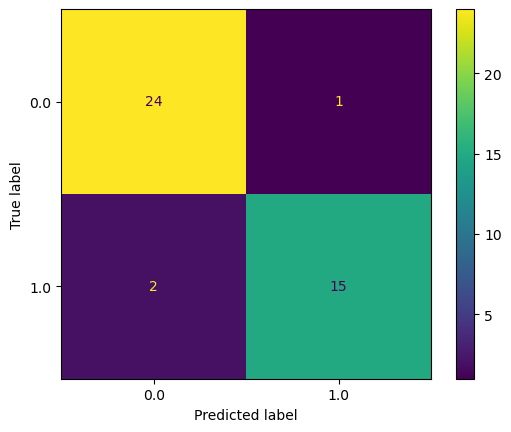

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        25
         1.0       0.94      0.88      0.91        17

    accuracy                           0.93        42
   macro avg       0.93      0.92      0.93        42
weighted avg       0.93      0.93      0.93        42



In [22]:
scaledX_test=scaler.transform(X_test)
predictions=model.predict(scaledX_test)
accuracy=accuracy_score(y_test, predictions)
print(f"Accuracy-> {round(accuracy, 2)}")

cm=confusion_matrix(y_test, predictions)
print(f"Confusion matrix:\n {cm}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, predictions))



